In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mystro-AIV4/W-05/Session/hotel_bookings.csv")

In [ ]:
def HndlingOutlier(Cname):
  Q1=np.quantile(Cname, 0.25)
  Q3=np.quantile(Cname, 0.75)
  IQR=Q3-Q1
  Lower=Q1-1.5*IQR
  print(f"Lower= {Lower}")
  Upper=Q3+1.5*IQR
  print(f"Upper= {Upper}")
  Outlier=Cname[(Cname<Lower) | (Cname>Upper)]
  print(f"Outliers:\n{Outlier}")
  return Outlier

In [ ]:
def ZscoreHndling(df):
  median_df=df.median()
  df_mad=np.abs(df-median_df)
  MAD=df_mad.median()
  MZ=(0.6745*(df-median_df))/MAD
  MZ_without_outlier=MZ[(MZ>-3) & (MZ<3)]
  print(f"MZ_without_outlier: \n{MZ_without_outlier}")
  outlier=MZ[(MZ<-3) | (MZ>3)]
  print(f"outlier:\n{outlier}")


  return outlier

In [ ]:
data1=data.copy()

In [ ]:
data1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
data1.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
data1=data1.drop("company", axis=1) #handilng company Column

In [ ]:
data1.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
data1["country"]=data1["country"].fillna(data1["country"].mode()[0])

In [ ]:
data1["agent"]=data1["agent"].fillna(data1["agent"].mean())

In [ ]:
data1["children"]=data1["children"].fillna(data1["children"].mean())

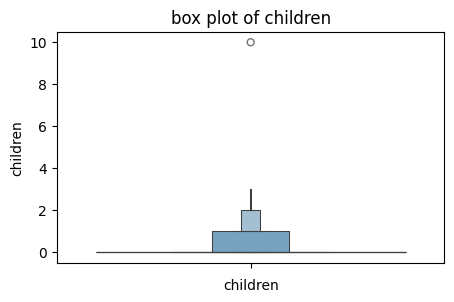

In [ ]:
plt.figure(figsize=(5,3))
sns.boxenplot(data=data1, y="children")
plt.title("box plot of children")
plt.xlabel("children")
plt.show()

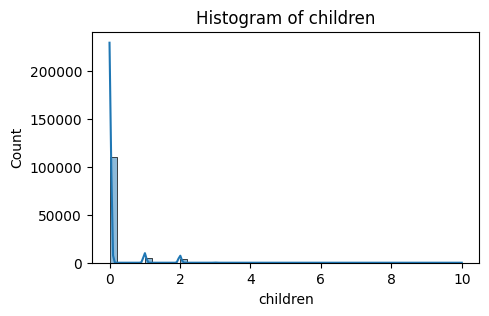

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(data1["children"], bins=50, kde=True)
plt.title("Histogram of children")
plt.xlabel("children")
plt.show()

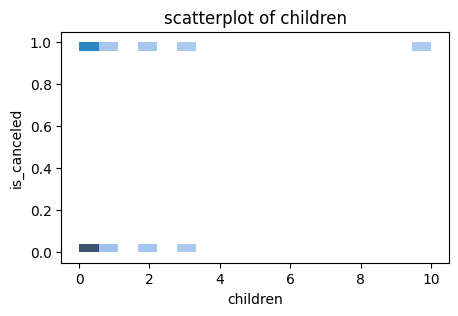

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(data=data1 , x="children", y="is_canceled")
plt.title("scatterplot of children")
plt.xlabel("children")
plt.show()

In [ ]:
HndlingOutlier(data1["stays_in_week_nights"])

Lower= -2.0
Upper= 6.0
Outliers:
30        10
31        11
32         8
51         8
52        10
          ..
119255     7
119260     8
119292     8
119369     7
119389     7
Name: stays_in_week_nights, Length: 3354, dtype: int64


,stays_in_week_nights
30,10
31,11
32,8
51,8
52,10
...,...
119255,7
119260,8
119292,8
119369,7


In [ ]:
ZscoreHndling(data1["stays_in_week_nights"])

MZ_without_outlier: 
0        -1.3490
1        -1.3490
2        -0.6745
3        -0.6745
4         0.0000
           ...  
119384    2.0235
119385    2.0235
119386    2.0235
119387    2.0235
119388    2.0235
Name: stays_in_week_nights, Length: 116036, dtype: float64
outlier:
30        5.3960
31        6.0705
32        4.0470
51        4.0470
52        5.3960
           ...  
119255    3.3725
119260    4.0470
119292    4.0470
119369    3.3725
119389    3.3725
Name: stays_in_week_nights, Length: 3354, dtype: float64


,stays_in_week_nights
30,5.3960
31,6.0705
32,4.0470
51,4.0470
52,5.3960
...,...
119255,3.3725
119260,4.0470
119292,4.0470
119369,3.3725


In [ ]:
numeric_columns=data1.select_dtypes(include=["int64","float64"])
numeric_columns

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,86.693382,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,86.693382,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,86.693382,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.000000,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.000000,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.000000,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.000000,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.000000,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.000000,0,104.40,0,0


للحصول على رسم بياني لكل عامود وبالتالي معرفة
اي الاعمدة تحتوي
                outliers

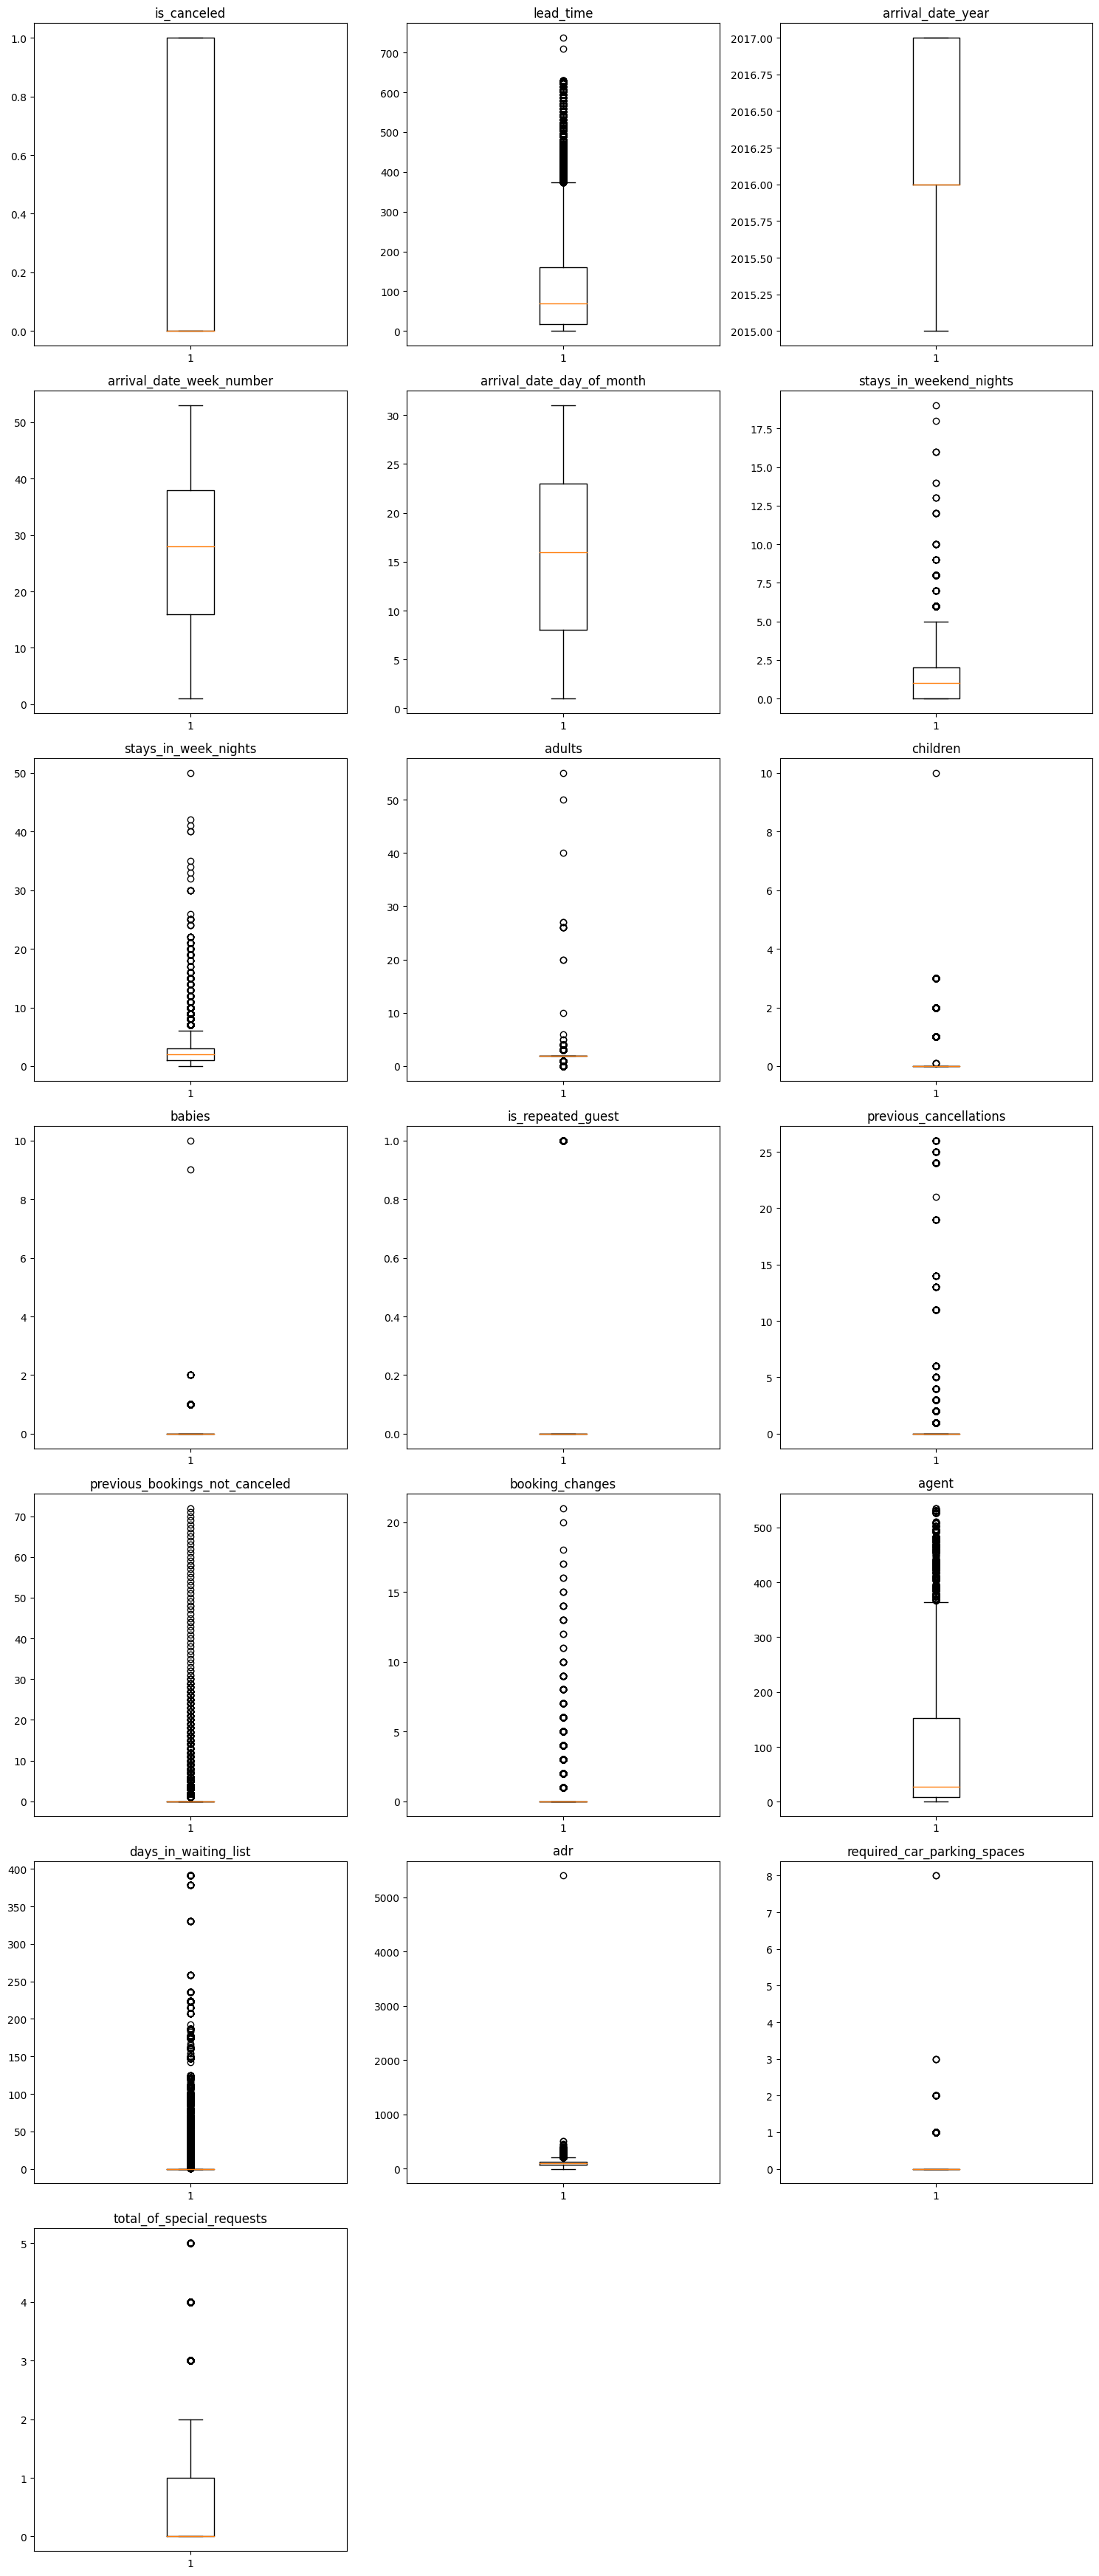

In [ ]:
numeric_columns = data1.select_dtypes(include=["int64", "float64"])

# حساب عدد الأعمدة الرقمية
num_columns = numeric_columns.shape[1]

# إعداد subplots مع تحديد عدد الصفوف والأعمدة بناءً على عدد الأعمدة الرقمية
cols = 3  # عدد الأعمدة في كل صف
rows = math.ceil(num_columns / cols)  # عدد الصفوف المطلوبة

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5*cols, 5*rows))

# تحويل المصفوفة axes إلى مصفوفة مسطحة
axes = axes.flatten()

# رسم boxplot لكل عمود رقمي
for i, col in enumerate(numeric_columns.columns):
    axes[i].boxplot(numeric_columns[col])
    axes[i].set_title(col)

# إخفاء المخططات الفارغة إذا كان هناك عدد أكبر من المخططات المطلوبة
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# ضبط التخطيط
plt.tight_layout()
plt.show()

In [ ]:
for i in numeric_columns:
  print(f"column name:{i}")
  ZscoreHndling(numeric_columns[i])
  print("_________________")


column name:is_canceled
MZ_without_outlier: 
Series([], Name: is_canceled, dtype: float64)
outlier:
8         inf
9         inf
10        inf
27        inf
32        inf
         ... 
110280    inf
111355    inf
111924    inf
111925    inf
117295    inf
Name: is_canceled, Length: 44224, dtype: float64
_________________
column name:lead_time
MZ_without_outlier: 
2        -0.696983
3        -0.629533
4        -0.618292
5        -0.618292
6        -0.775675
            ...   
119385   -0.517117
119386    0.370975
119387   -0.393458
119388    0.449667
119389    1.528867
Name: lead_time, Length: 114552, dtype: float64
outlier:
0         3.068975
1         7.509433
81        3.361258
82        3.316292
225       3.653542
            ...   
119107    5.047508
119109    5.047508
119111    5.047508
119148    4.361767
119228    3.057733
Name: lead_time, Length: 4838, dtype: float64
_________________
column name:arrival_date_year
MZ_without_outlier: 
0        -0.6745
1        -0.6745
2        -0.

In [ ]:
data1=data1.drop(ZscoreHndling(data1["stays_in_weekend_nights"]).index)

MZ_without_outlier: 
0        -0.6745
1        -0.6745
2        -0.6745
3        -0.6745
4        -0.6745
           ...  
119385    0.6745
119386    0.6745
119387    0.6745
119388    0.6745
119389    0.6745
Name: stays_in_weekend_nights, Length: 119125, dtype: float64
outlier:
87        3.3725
1149      3.3725
1655      8.0940
1754      3.3725
1790      4.7215
           ...  
103282    5.3960
105050    3.3725
106335    3.3725
106561    8.0940
109038    4.7215
Name: stays_in_weekend_nights, Length: 265, dtype: float64


In [ ]:
ZscoreHndling(data1["stays_in_weekend_nights"])

MZ_without_outlier: 
0        -0.6745
1        -0.6745
2        -0.6745
3        -0.6745
4        -0.6745
           ...  
119385    0.6745
119386    0.6745
119387    0.6745
119388    0.6745
119389    0.6745
Name: stays_in_weekend_nights, Length: 119125, dtype: float64
outlier:
Series([], Name: stays_in_weekend_nights, dtype: float64)


,stays_in_weekend_nights


**Data Scaling**

**Min-Max Scaling**

In [ ]:
data2=data1.copy()

In [ ]:
numeric_columns = data2.select_dtypes(include=["int64", "float64"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def MinMax_scaler(cmn):
  scaler=MinMaxScaler()
  scaled_data=scaler.fit_transform(cmn.to_numpy().reshape(-1,1))
  return scaled_data



In [ ]:
MinMax_scaler(numeric_columns["agent"])

array([[0.1604745 ],
       [0.1604745 ],
       [0.1604745 ],
       ...,
       [0.01498127],
       [0.16479401],
       [0.01498127]])

**Z-Score Scaling**

In [ ]:
def Z_score(columnname):
 from sklearn.preprocessing import StandardScaler

 scaler=StandardScaler()

 scaled_data=scaler.fit_transform(columnname.to_numpy().reshape(-1,1))
 return scaled_data


In [ ]:
data3=numeric_columns.copy()

In [ ]:
Z_score(data3["agent"])

array([[ 0.001575  ],
       [ 0.001575  ],
       [ 0.001575  ],
       ...,
       [-0.75464766],
       [ 0.02402629],
       [-0.75464766]])

In [ ]:
gby=data3.groupby("children")[["agent"]].count()
gby

,agent
children,
0.00000,110541
0.10389,4
1.00000,4858
2.00000,3645
3.00000,76
10.00000,1


In [ ]:
cd=data3[["children","agent"]]
c=cd.corr()                         #لحساب مقدار الترابط بين قيم العامود الاول مع قيم العامود الثاني
print(c)

          children     agent
children  1.000000  0.039914
agent     0.039914  1.000000


In [ ]:
data1["stays_in_weekend_nights"].value_counts()                          #عدد مرات ظهور كل قيمة فريدة

,count
stays_in_weekend_nights,
0,51998
2,33308
1,30626
4,1855
3,1259
5,79


In [ ]:
data1["children"].value_counts()                     #مثال : عدد الحجزات التي فيها طفل واحد بس هي 4858

,count
children,
0.00000,110541
1.00000,4858
2.00000,3645
3.00000,76
0.10389,4
10.00000,1
